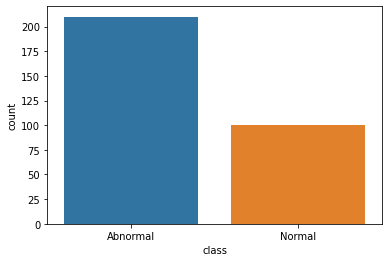

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

veri = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri.csv")
veri.head()

sns.countplot(veri["class"])
plt.show()

veri["class"] = [1 if each == "Abnormal" else 0 for each in veri["class"]]
veri.head()

veri.info()

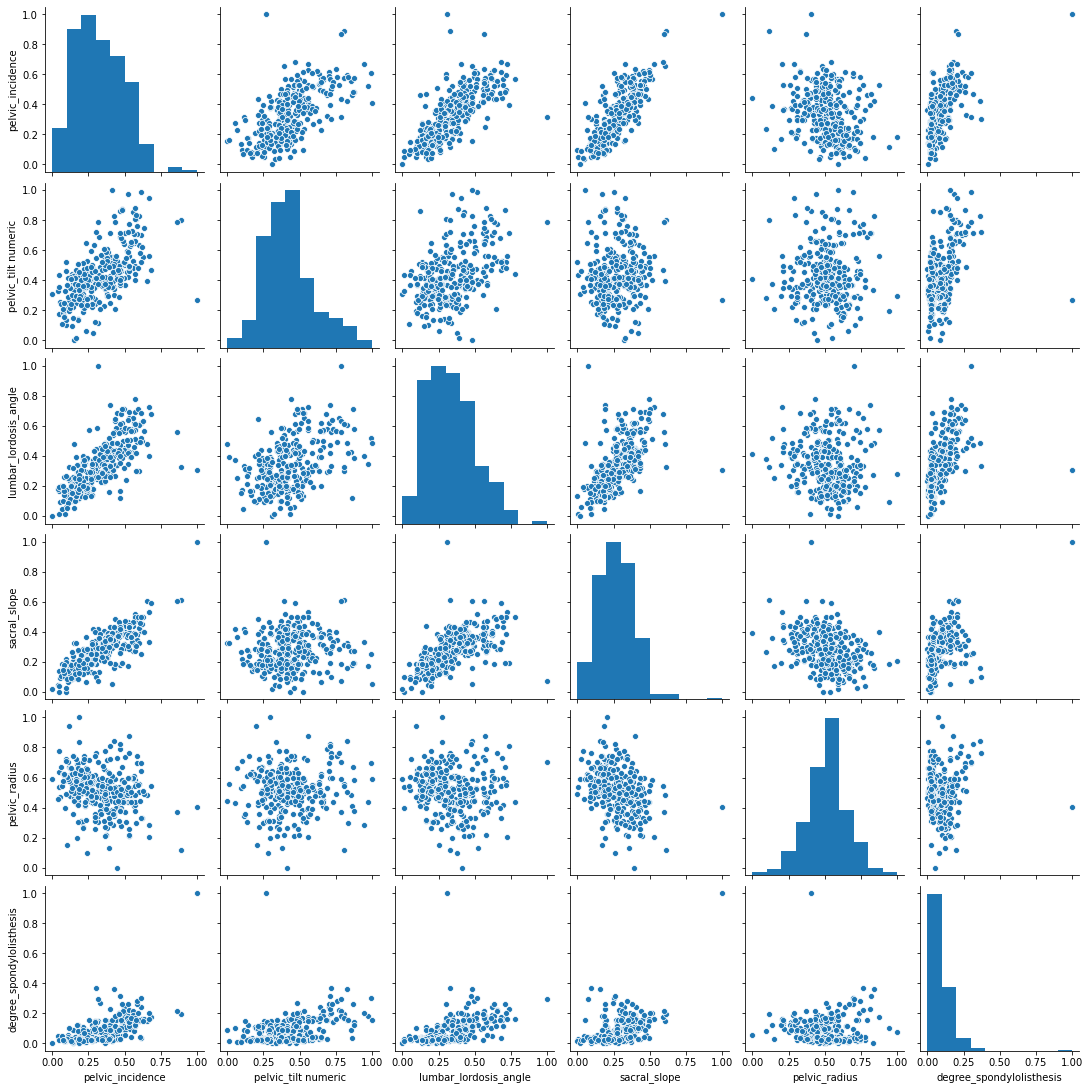

In [9]:
y = veri["class"].values 
x_veri = veri.drop(["class"], axis = 1)

# min-max normalizasyonu
x = (x_veri - np.min(x_veri)) / (np.max(x_veri) - np.min(x_veri))

sns.pairplot(x)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

lr = LogisticRegression()
lr.fit(x_train,y_train)

egitim_dogrulugu = lr.score(x_train, y_train)
print("Eğitim Doğruluğu:", egitim_dogrulugu)

test_dogrulugu = lr.score(x_test, y_test)
print("Test Doğruluğu:", test_dogrulugu)

Eğitim Doğruluğu: 0.7490494296577946
Test Doğruluğu: 0.7872340425531915


12 en yakın komşuluk algoritması test doğruluğu: 0.7872340425531915


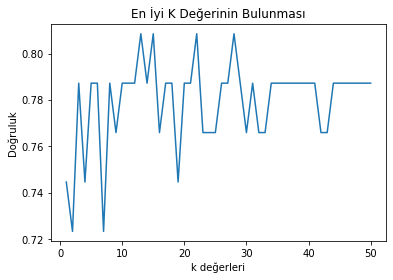

In [20]:
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 12
knn = KNeighborsClassifier(n_neighbors = komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
skor = knn.score(x_test,y_test)
print("{} en yakın komşuluk algoritması test doğruluğu: {}".format(komsu_sayisi, skor))

skor_listesi = []
for each in range(1,51):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    skor = knn2.score(x_test,y_test)
    skor_listesi.append(skor)

plt.plot(range(1,51),skor_listesi)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En İyi K Değerinin Bulunması")
plt.show()


In [21]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
svm_skoru = svm.score(x_test,y_test)

print("Destek Vektör Makinesi Modeli Doğruluğu:", svm_skoru)

Destek Vektör Makinesi Modeli Doğruluğu: 0.851063829787234


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_skoru = dt.score(x_test,y_test)

print("Karar Ağacı Doğruluğu:", dt_skoru)

Karar Ağacı Doğruluğu: 0.7872340425531915


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train,y_train)

rf_skoru = rf.score(x_test,y_test)

print("Karar Ağacı Doğruluğu:", rf_skoru)

Karar Ağacı Doğruluğu: 0.851063829787234


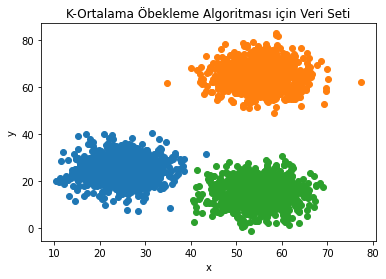

In [27]:
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(65,5,1000)

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis = 0)
y = np.concatenate((y1,y2,y3), axis = 0)

plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Öbekleme Algoritması için Veri Seti")
plt.show()


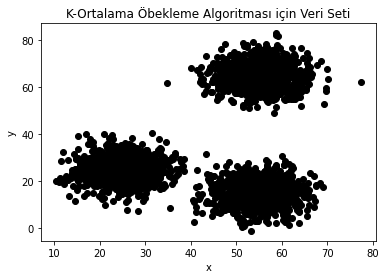

In [28]:
plt.figure()
plt.scatter(x1,y1, color = "black")
plt.scatter(x2,y2, color = "black")
plt.scatter(x3,y3, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Öbekleme Algoritması için Veri Seti")
plt.show()


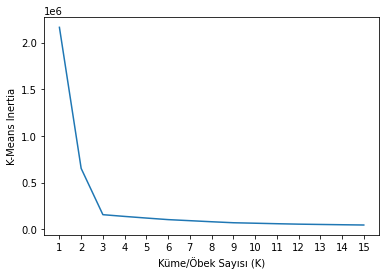

In [29]:
from sklearn.cluster import KMeans

# Elbow method 

sozluk = {"x":x, "y":y}
veri_seti = pd.DataFrame(sozluk)

degisken = []

for k in range(1,16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(veri_seti)
    degisken.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,16),degisken)
plt.xticks(range(1,16))
plt.xlabel("Küme/Öbek Sayısı (K)")
plt.ylabel("K-Means Inertia")
plt.show()

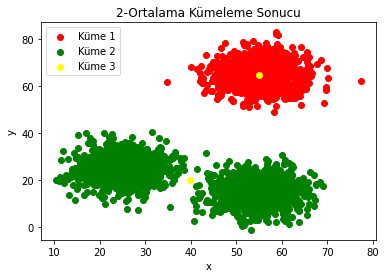

In [31]:
k_ortalama = KMeans(n_clusters = 2)
kumeler = k_ortalama.fit_predict(veri_seti)
veri_seti["label"] = kumeler

plt.figure()
plt.scatter(veri_seti.x[veri_seti.label == 0], veri_seti.y[veri_seti.label == 0], color = "red", label = "Küme 1")
plt.scatter(veri_seti.x[veri_seti.label == 1], veri_seti.y[veri_seti.label == 1], color = "green", label = "Küme 2")
# plt.scatter(veri_seti.x[veri_seti.label == 2], veri_seti.y[veri_seti.label == 2], color = "blue", label = "Küme 3")
plt.scatter(k_ortalama.cluster_centers_[:,0], k_ortalama.cluster_centers_[:,1], color = "yellow", label = "Küme 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("2-Ortalama Kümeleme Sonucu")
plt.show()
